# Smoking Cessation Training Model using ASDM

## By Wang Zhao and Matt Stammers

### Last Updated: 22/07/2023

Welcome to the Training notebook for ASDM. 

If this notebook is not running immediately please review the readme which has the instructions to get the notebook working correctly. If you follow them it should work.

In [2]:
# Import key dependencies

import pandas as pd
import streamlit as st
import plotly.graph_objects as go
from IPython.display import Image

# This is how you build an ASDM object
from ASDM.ASDM import Structure

## The Model

Below is the Stella Model we will be looking at

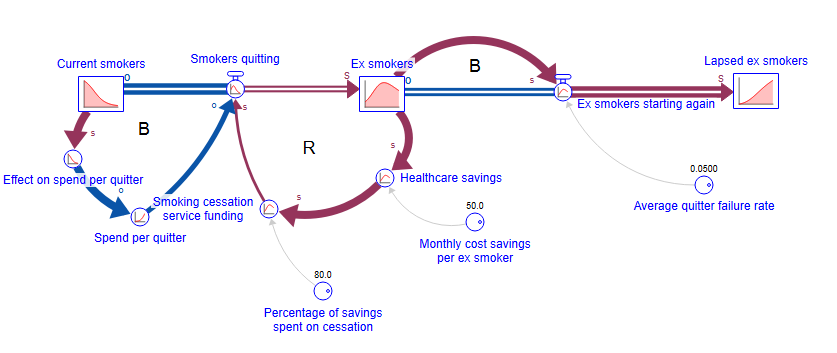

In [3]:
# This is the model we are going to build

Image('assets/Smoking_Cessation_Model.png')

## As you can see

This is a fairly simple feedback system where the main lever open to care commissioners is the percentage of savings re-invested in cessation. To illustrate what happens next we will make the structure object manually and then compile the model from source.

In [4]:
# Manually Constructed Smoking Cessation Object

class SmokingCessation(Structure):
    def __init__(self):
        super(SmokingCessation, self).__init__()
        self.add_stock("currentSmokers", 900, non_negative=True)
        self.add_stock("exSmokers", 100, non_negative=True)
        self.add_stock("lapsedExSmokers", 0, non_negative=True)
        self.add_flow("smokersQuitting", "smokingCessationServiceFunding/spendPerQuitter")        
        self.add_flow("exSmokersStartingAgain", "exSmokers*averageQuitterFailureRate")
        self.add_aux("effectOnSpendPerQuitter", "currentSmokers/init(currentSmokers)")
        self.add_aux("spendPerQuitter", "200/effectOnSpendPerQuitter")
        self.add_aux("percentageOfSavingsSpentOnCessation", 80)                
        self.add_aux("averageQuitterFailureRate", 0.05)
        self.add_aux("healthcareSavings", "exSmokers*monthlyCostSavingsPerExSmoker")
        self.add_aux("smokingCessationServiceFunding", "(healthcareSavings*percentageOfSavingsSpentOnCessation)/100")
        self.add_aux("monthlyCostSavingsPerExSmoker", 50)

## Painful

Ouch, imagine coding these out every time manually - forget it. As we all know it is much easier to design these models using a frontend like Stella. So mimicing real-world workflows that is exactly what we have done here:

In [5]:
# Create an instance of the model

model = Structure('models/smoking cessation demo.stmx')

ENGINE Reading XMILE model from models/smoking cessation demo.stmx


## That was Easy

This is why we built the compiler - because without it live is a bit miserable. Nobody wants to spend their time manually editing XML files. Now we can simulate the model:

In [6]:
# Export the Simulation Results

model.simulate()

## This creates our results

But first we have to get them out. Extracting the results is a two-step process

In [7]:
# 1. First export to a dictionary

smoking_outcome_dict = model.export_simulation_result()

# 2. Then convert to a dataframe
df_smoking_outcome = pd.DataFrame(smoking_outcome_dict)

## Boom 

Here we have our data from the run of the model :)

In [8]:
df_smoking_outcome.head()

,Current_smokers,Ex_smokers,Monthly_cost_savings_per_ex_smoker,Healthcare_savings,Percentage_of_savings_spent_on_cessation,Smoking_cessation_service_funding,Effect_on_spend_per_quitter,Spend_per_quitter,Smokers_quitting,Average_quitter_failure_rate,Ex_smokers_starting_again,Lapsed_ex_smokers,Months
0,900.000000,100.000000,50.0,5000.000000,80.0,4000.000000,1.000000,200.000000,20.000000,0.05,5.000000,0.000000,0.00
1,895.000000,103.750000,50.0,5187.500000,80.0,4150.000000,0.994444,201.117318,20.634722,0.05,5.187500,1.250000,0.25
2,889.841319,107.611806,50.0,5380.590278,80.0,4304.472222,0.988713,202.283257,21.279429,0.05,5.380590,2.546875,0.50
3,884.521462,111.586515,50.0,5579.325763,80.0,4463.460611,0.982802,203.499867,21.933482,0.05,5.579326,3.892023,0.75
4,879.038092,115.675054,50.0,5783.752712,80.0,4627.002170,0.976709,204.769283,22.596173,0.05,5.783753,5.286854,1.00


## Plotting the Results

Now we can plot our results

In [9]:
# Columns to plot
columns_to_plot = ["Current_smokers", "Ex_smokers", "Ex_smokers_starting_again"]

# Define colors for each line
colors = ["blue", "green", "red"]

# Create a figure
fig = go.Figure()

# Add a line for each column to plot
for column, color in zip(columns_to_plot, colors):
    fig.add_trace(go.Scatter(x=df_smoking_outcome['Months'], y=df_smoking_outcome[column], mode='lines', 
                             name=column, line=dict(color=color)))

# Set layout properties
fig.update_layout(
    xaxis_title='Months',
    yaxis_title='Number of Smokers',
)

# Show the figure
fig.show()

# Now to change the inputs and re-run

It's one thing to run a model as is but the real power of SD comes from being able to simulate the future based on changing the present situation. What if we were to alter the percentage reinvested in smoking cessation?

In [13]:
# First we need to see what the current percentage is. We can do this by accessing the variables as follows - this will give us the full dictionary

model.aux_equations

{'Effect_on_spend_per_quitter': 'Current_smokers/INIT(Current_smokers)',
 'Healthcare_savings': 'Ex_smokers*Monthly_cost_savings_per_ex_smoker',
 'Monthly_cost_savings_per_ex_smoker': '50',
 'Smoking_cessation_service_funding': 'Healthcare_savings*(Percentage_of_savings_spent_on_cessation/100)',
 'Spend_per_quitter': '200/Effect_on_spend_per_quitter',
 'Percentage_of_savings_spent_on_cessation': '60',
 'Average_quitter_failure_rate': '0.05'}

In [ ]:
# We can then replace the values of this element as follows

model.replace_element_equation('Percentage_of_savings_spent_on_cessation', "90")

In [11]:




model.simulate()